In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
BAN_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_CP.csv')
BAN_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_ADNI.csv')
BAN_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_CogConVar.csv')
BAN_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/BrainAgeNeXt/BAN_NCN.csv')

DBN_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_CP_BET.csv')
DBN_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_ADNI_BET.csv')
DBN_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_CogConVar_BET.csv')
DBN_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/DeepBrainNet/DBN_NCN_BET.csv')

pyment_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_CP.csv')
pyment_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_ADNI.csv')
pyment_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_CogConVar.csv')
pyment_NCN=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/pyment/pyment_NCN.csv')

ENIGMA_CP=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_CP.csv')
ENIGMA_ADNI=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_ADNI.csv')
ENIGMA_NCN= pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_NCN.csv')
ENIGMA_CogConVar=pd.read_csv('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/predictions/ENIGMA/ENIGMA_CogConVar.csv')

In [4]:
ENIGMA_ADNI=ENIGMA_ADNI[ENIGMA_ADNI['Group']=='CN'] 
pyment_ADNI=pyment_ADNI[pyment_ADNI['Group']=='CN']
DBN_ADNI=DBN_ADNI[DBN_ADNI['Group']=='CN']
BAN_ADNI=BAN_ADNI[BAN_ADNI['Group']=='CN']


In [206]:
# Sample 97 random subjects from each dataset
BAN_CP_sample = BAN_CP.sample(n=97, random_state=42)
BAN_ADNI_sample = BAN_ADNI.sample(n=97, random_state=42)
BAN_CogConVar_sample = BAN_CogConVar.sample(n=97, random_state=42)
BAN_NCN_sample = BAN_NCN.sample(n=97, random_state=42)

DBN_CP_sample = DBN_CP.sample(n=97, random_state=42)
DBN_ADNI_sample = DBN_ADNI.sample(n=97, random_state=42)
DBN_CogConVar_sample = DBN_CogConVar.sample(n=97, random_state=42)
DBN_NCN_sample = DBN_NCN.sample(n=97, random_state=42)

pyment_CP_sample = pyment_CP.sample(n=97, random_state=42)
pyment_ADNI_sample = pyment_ADNI.sample(n=97, random_state=42)
pyment_CogConVar_sample = pyment_CogConVar.sample(n=97, random_state=42)
pyment_NCN_sample = pyment_NCN.sample(n=97, random_state=42)

ENIGMA_CP_sample = ENIGMA_CP.sample(n=97, random_state=42)
ENIGMA_ADNI_sample = ENIGMA_ADNI.sample(n=97, random_state=42)
ENIGMA_NCN_sample = ENIGMA_NCN.sample(n=97, random_state=42)
ENIGMA_CogConVar_sample = ENIGMA_CogConVar.sample(n=97, random_state=42)

In [207]:
ENIGMA_CP_sample.rename(columns={'Absolute_Error': 'Absolute Error', 'Edad':'Age'}, inplace=True)
ENIGMA_CP_sample=ENIGMA_CP_sample[['ID','Absolute Error','Error','Age']]

ENIGMA_ADNI_sample=ENIGMA_ADNI_sample[['ID','Absolute Error','Error','Age']]

ENIGMA_NCN_sample.rename(columns={'participant_id': 'ID', 'age':'Age'}, inplace=True)
ENIGMA_NCN_sample=ENIGMA_NCN_sample[['ID','Absolute Error','Error','Age']]
ENIGMA_NCN_sample['ID']='NCN_' + ENIGMA_NCN_sample['ID']

ENIGMA_CogConVar_sample.rename(columns={'participant_id': 'ID', 'age':'Age'}, inplace=True)
ENIGMA_CogConVar_sample=ENIGMA_CogConVar_sample[['ID','Absolute Error','Error','Age']]

concat_ENIGMA = pd.concat([ENIGMA_CP_sample, ENIGMA_ADNI_sample, ENIGMA_NCN_sample, ENIGMA_CogConVar_sample], ignore_index=True)

In [208]:
DBN_CP_sample.rename(columns={'Edad': 'Age'}, inplace=True)
DBN_CP_sample=DBN_CP_sample[['ID','Absolute_Error','Error','Age']]

DBN_ADNI_sample.rename(columns={'Absolute_error': 'Absolute_Error'}, inplace=True)
DBN_ADNI_sample=DBN_ADNI_sample[['ID','Absolute_Error','Error','Age']]

DBN_NCN_sample.rename(columns={'participant_id': 'ID','age':'Age'}, inplace=True)
DBN_NCN_sample.rename(columns={'Absolute_error': 'Absolute_Error'}, inplace=True)
DBN_NCN_sample=DBN_NCN_sample[['ID','Absolute_Error','Error','Age']]
DBN_NCN_sample['ID']='NCN_' + DBN_NCN_sample['ID']

DBN_CogConVar_sample.rename(columns={'participant_id': 'ID'}, inplace=True)
DBN_CogConVar_sample.rename(columns={'Absolute_error': 'Absolute_Error','age':'Age'}, inplace=True)
DBN_CogConVar_sample=DBN_CogConVar_sample[['ID','Absolute_Error','Error','Age']]

concat_DBN = pd.concat([DBN_CP_sample, DBN_ADNI_sample, DBN_NCN_sample, DBN_CogConVar_sample], ignore_index=True)

In [209]:
pyment_CP_sample.rename(columns={'Edad':'Age'},inplace=True)
pyment_CP_sample=pyment_CP_sample[['ID','Absolute_Error','Error','Age']]

pyment_ADNI_sample=pyment_ADNI_sample[['ID','Absolute_Error','Error','Age']]

pyment_NCN_sample.rename(columns={'participant_id': 'ID','age':'Age'}, inplace=True)
pyment_NCN_sample=pyment_NCN_sample[['ID','Absolute_Error','Error','Age']]
pyment_NCN_sample['ID']='NCN_' + pyment_NCN_sample['ID']

pyment_CogConVar_sample.rename(columns={'participant_id': 'ID','age':'Age'}, inplace=True)
pyment_CogConVar_sample=pyment_CogConVar_sample[['ID','Absolute_Error','Error','Age']]

concat_pyment = pd.concat([pyment_CP_sample, pyment_ADNI_sample, pyment_NCN_sample, pyment_CogConVar_sample], ignore_index=True)

In [210]:
concat_pyment

,ID,Absolute_Error,Error,Age
0,CP0178,5.126610,-5.126610,42.0
1,CP0154,3.306828,3.306828,42.0
2,CP0024,5.444786,5.444786,46.0
3,CP0075,8.755250,-8.755250,49.0
4,CP0200,9.488384,-9.488384,64.0
...,...,...,...,...
383,sub-065,9.790367,9.790367,49.0
384,sub-076,0.400180,0.400180,78.0
385,sub-066,12.517790,-12.517790,47.0
386,sub-062,1.174940,1.174940,30.0


In [211]:
BAN_CP_sample.rename(columns={'Edad':'Age'}, inplace=True)
BAN_CP_sample=BAN_CP_sample[['ID','Absolute_Error','Error','Age']]

BAN_ADNI_sample=BAN_ADNI_sample[['ID','Absolute_Error','Error','Age']]

BAN_CogConVar_sample.rename(columns={'participant_id': 'ID','age':'Age'}, inplace=True)
BAN_CogConVar_sample=BAN_CogConVar_sample[['ID','Absolute_Error','Error','Age']]
BAN_CogConVar_sample['ID']='CogConVar_' + BAN_CogConVar_sample['ID']

BAN_NCN_sample.rename(columns={'participant_id': 'ID','age':'Age'}, inplace=True)
BAN_NCN_sample=BAN_NCN_sample[['ID','Absolute_Error','Error','Age']]

concat_BAN = pd.concat([BAN_CP_sample, BAN_ADNI_sample, BAN_NCN_sample, BAN_CogConVar_sample], ignore_index=True)

In [212]:
BAN_MAE=concat_BAN['Absolute_Error'].mean()
DBN_MAE=concat_DBN['Absolute_Error'].mean()
pyment_MAE=concat_pyment['Absolute_Error'].mean()
ENIGMA_MAE=concat_ENIGMA['Absolute Error'].mean()
#lo mismo pero con el error
BAN_ME=concat_BAN['Error'].mean()
DBN_ME=concat_DBN['Error'].mean()
pyment_ME=concat_pyment['Error'].mean()
ENIGMA_ME=concat_ENIGMA['Error'].mean()
#desvio estandar
BAN_astd=concat_BAN['Absolute_Error'].std()
DBN_astd=concat_DBN['Absolute_Error'].std()
pyment_astd=concat_pyment['Absolute_Error'].std()
ENIGMA_astd=concat_ENIGMA['Absolute Error'].std()

BAN_std=concat_BAN['Error'].std()
DBN_std=concat_DBN['Error'].std()
pyment_std=concat_pyment['Error'].std()
ENIGMA_std=concat_ENIGMA['Error'].std()

In [213]:
print(f"BAN: {BAN_MAE}")
print(f"DBN: {DBN_MAE}")
print(f"pyment: {pyment_MAE}")
print(f"ENIGMA: {ENIGMA_MAE}")

BAN: 4.56142574428283
DBN: 6.207536471649485
pyment: 3.6675822532299747
ENIGMA: 12.309472543825253


In [214]:
print(f"BAN: {BAN_ME}")
print(f"DBN: {DBN_ME}")
print(f"pyment: {pyment_ME}")
print(f"ENIGMA: {ENIGMA_ME}")

BAN: -3.7203962554931627
DBN: 2.096501234536083
pyment: -1.039992682170543
ENIGMA: -2.0240284787826988


In [215]:
print(f"BAN astd: {BAN_astd}")
print(f"DBN astd: {DBN_astd}")
print(f"pyment astd: {pyment_astd}")
print(f"ENIGMA astd: {ENIGMA_astd}")

BAN astd: 3.6725210436847076
DBN astd: 4.658936651664468
pyment astd: 2.9377573869057394
ENIGMA astd: 8.859153361071629


In [216]:
print(f"BAN std: {BAN_std}")
print(f"DBN std: {DBN_std}")
print(f"pyment std: {pyment_std}")
print(f"ENIGMA std: {ENIGMA_std}")

BAN std: 4.52445194668876
DBN std: 7.478776285336921
pyment std: 4.586070082340863
ENIGMA std: 15.04300395960764


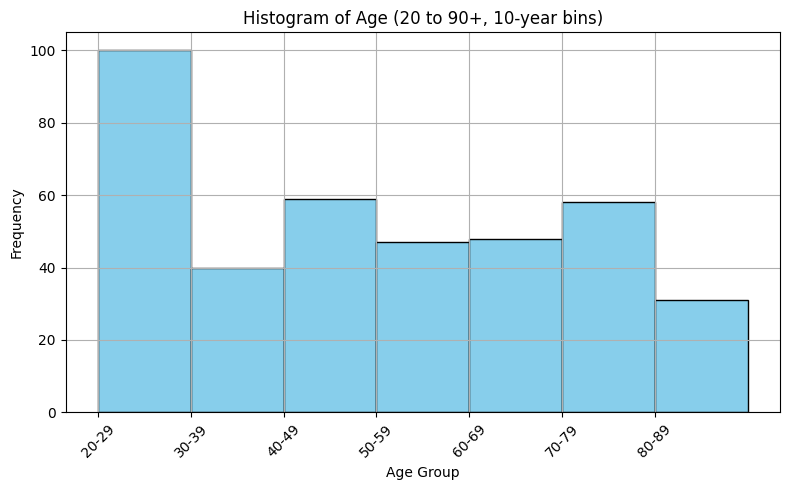

In [217]:
import matplotlib.pyplot as plt

# Verificamos que la columna 'Age' exista y no tenga valores nulos
if 'Age' in concat_BAN.columns:
    age_data = concat_BAN['Age'].dropna()

    # Definimos los límites de los bins
    bins = [20, 30, 40, 50, 60, 70, 80, 90]  # 120 como máximo razonable

    # Etiquetas opcionales para los bins
    labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

    plt.figure(figsize=(8, 5))
    plt.hist(age_data, bins=bins, color='skyblue', edgecolor='black')
    plt.title('Histogram of Age (20 to 90+, 10-year bins)')
    plt.xlabel('Age Group')
    plt.ylabel('Frequency')
    plt.xticks(bins[:-1], labels, rotation=45)  # omitimos el último límite en xticks
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'Age' no se encuentra en el DataFrame.")



In [218]:
# Definimos los límites de los bins y sus etiquetas
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Creamos una nueva columna en el DataFrame con la categoría correspondiente
concat_BAN['Age_bin'] = pd.cut(concat_BAN['Age'], bins=bins, labels=labels, right=False)
concat_DBN['Age_bin'] = pd.cut(concat_DBN['Age'], bins=bins, labels=labels, right=False)
concat_pyment['Age_bin'] = pd.cut(concat_pyment['Age'], bins=bins, labels=labels, right=False)
concat_ENIGMA['Age_bin'] = pd.cut(concat_ENIGMA['Age'], bins=bins, labels=labels, right=False)

In [219]:
mean_error_by_bin_BAN = concat_BAN.groupby('Age_bin')['Error'].mean()
mean_error_by_bin_DBN = concat_DBN.groupby('Age_bin')['Error'].mean()
mean_error_by_bin_pyment = concat_pyment.groupby('Age_bin')['Error'].mean()
mean_error_by_bin_ENIGMA = concat_ENIGMA.groupby('Age_bin')['Error'].mean()

/tmp/ipykernel_582209/3158249565.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_error_by_bin_BAN = concat_BAN.groupby('Age_bin')['Error'].mean()
/tmp/ipykernel_582209/3158249565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_error_by_bin_DBN = concat_DBN.groupby('Age_bin')['Error'].mean()
/tmp/ipykernel_582209/3158249565.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_error_by_bin_pyment = co

In [221]:
mean_error_by_bin_BAN

Age_bin
20-29   -1.590672
30-39   -3.512308
40-49   -4.361859
50-59   -4.193119
60-69   -2.280226
70-79   -5.476091
80-89   -6.920789
Name: Error, dtype: float64